In [1]:
#Ch 1
import numpy as np

x = np.array([[1,2,3],[4,5,6]])
print("x:\n{}".format(x))

x:
[[1 2 3]
 [4 5 6]]


In [2]:
from scipy import sparse

# Creates a 2D numpy array with a diagonal on ones and zeros everywhere
eye = np.eye(4)
print("Numpy array:\n{}".format(eye))

Numpy array:
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [3]:
#Convert the numpy array to a scipy sparse matrix in CSR format. Only the non eroes are stored
sparse_matrix = sparse.csr_matrix(eye)
print("\nScipy sparse CSR matrix:\n{}".format(sparse_matrix))


Scipy sparse CSR matrix:
  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


In [4]:
#create a sparse matrix on COO format
data = np.ones(4)
row_indices = np.arange(4)
col_indices = np.arange(4)
eye_coo = sparse.coo_matrix((data,(row_indices,col_indices)))
print("COO representation:\n{}".format(eye_coo))

COO representation:
  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


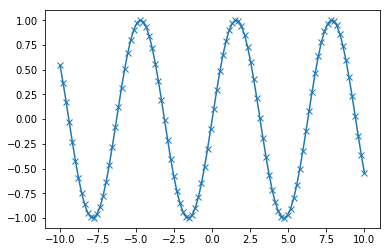

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

#Generate a sequence of no. from -10 to 10 with 100 steps between
x=np.linspace(-10,10,100)
#Create a second array using sine
y=np.sin(x)
#Plot function makes a line chart of one array against another
plt.plot(x,y,marker="x")

In [6]:
import pandas as pd

#create a dataset of people
data = {'Name':["Ming","Wei",'Bezos','Elon'],
       'Location':['China', 'Australia', 'USA', 'USA'],
       'Age': [31,36,50,50]
       }

data_pandas = pd.DataFrame(data)
#IPython displays allows 'pretty printing of dataframes in the Jupyter Notebook' (2 display options)
#display(data_pandas)
display (data_pandas[data_pandas.Age<36])

,Name,Location,Age
0,Ming,China,31


In [7]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [8]:
print('keys of iris_dataset:\n{}'.format(iris_dataset.keys()))

keys of iris_dataset:
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [9]:
print(iris_dataset['DESCR'][:193]+'\n...')

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive att
...


In [10]:
print('Target names:{}'.format(iris_dataset['target_names']))

Target names:['setosa' 'versicolor' 'virginica']


In [11]:
print('Feature names:\n{}'.format(iris_dataset['feature_names']))

Feature names:
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [12]:
print('Type of data:{}'.format(type(iris_dataset['data'])))

Type of data:<class 'numpy.ndarray'>


In [13]:
print('Shape of data{}'.format(iris_dataset['data'].shape))

Shape of data(150, 4)


In [14]:
print('First five columns of data:\n{}'.format(iris_dataset['data'][:5]))

First five columns of data:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [15]:
print('Type of target:{}'.format(type(iris_dataset['target'])))

Type of target:<class 'numpy.ndarray'>


In [16]:
print('Shape of target:{}'.format(iris_dataset['target'].shape))

Shape of target:(150,)


In [17]:
print('Target:\n{}'.format(iris_dataset['target']))
# 0 = setosa; 1=veriscolor;2=virginica

Target:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(iris_dataset['data'],iris_dataset['target'],random_state=0)

In [19]:
print('X_train shape:{}'.format(X_train.shape))
print('y_train shape:{}'.format(y_train.shape))

X_train shape:(112, 4)
y_train shape:(112,)


In [20]:
print('X_test shape:{}'.format(X_test.shape))
print('y_test shape:{}'.format(y_test.shape))

X_test shape:(38, 4)
y_test shape:(38,)


/Users/apple/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  after removing the cwd from sys.path.


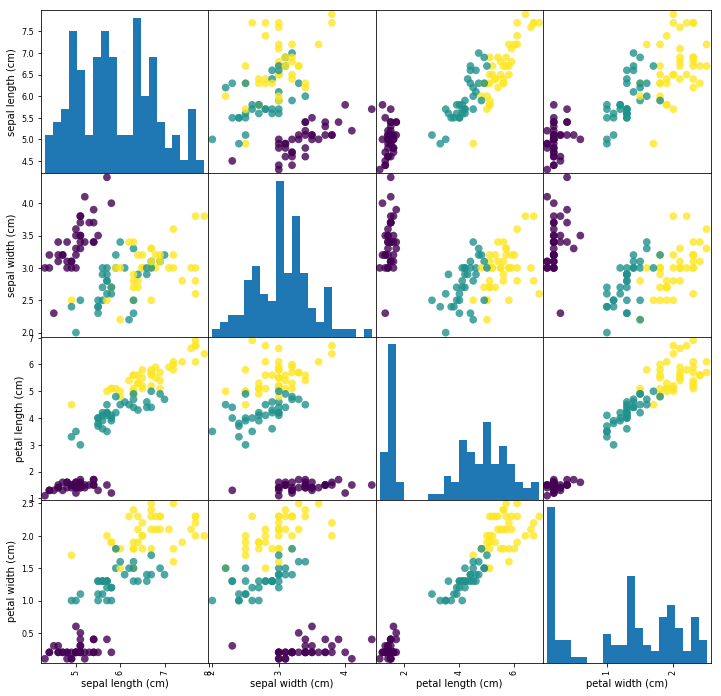

In [21]:
#create dataframe from data in X_train. Label col using strings in iris_dataset.features_names
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
#create a scatter matrix from the dataframe, color by y_train; pair of Iris dataset colored bu class label
grr = pd.scatter_matrix(iris_dataframe,c=y_train,figsize=(12,12),marker='0',hist_kwds={'bins':20},s=60,alpha=.8)

In [22]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [23]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [24]:
#Predictions
X_new=np.array([[5,2.9,1,0.2]])
print('X_new.shape:{}'.format(X_new.shape))

X_new.shape:(1, 4)


In [25]:
prediction=knn.predict(X_new)
print('Prediction:{}'.format(prediction))
print('Predicted target name:{}'.format(iris_dataset['target_names'][prediction]))

Prediction:[0]
Predicted target name:['setosa']


In [26]:
#Model Evaluation
y_pred=knn.predict(X_test)
print('Test set predictions:\n{}'.format(y_pred))

Test set predictions:
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [27]:
print('Test set score:{:.2f}'.format(np.mean(y_pred==y_test)))

Test set score:0.97


In [28]:
print('Test set score:{:.2f}'.format(knn.score(X_test,y_test)))

Test set score:0.97


In [29]:
#Summary of codes for whole trg n evaluation
X_train,X_test,y_train,y_test=train_test_split(iris_dataset['data'],iris_dataset['target'],random_state=0)

knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

print('Test set score:{:.2f}'.format(knn.score(X_test,y_test)))

Test set score:0.97


In [30]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys():\n", cancer.keys())

cancer.keys():
 dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [31]:
print("Shape of cancer data:", cancer.data.shape)


Shape of cancer data: (569, 30)


In [32]:
#print("Sample counts per class:\n",
      #{n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})

In [33]:
print("Feature names:\n", cancer.feature_names)

Feature names:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
